## Understanding The Parameters of Our Linear Model

In the last lesson, we were concerned primarily with using our linear model to make predictions and understanding the uncertainty associated with those predictions. But how does R choose which line is the "best?" How did it pick which line to draw? We are now going to dive deeper into the internals of our linear model and understand how its parameters are chosen, what they mean, and the level of uncertainty within them.

## Drawing Lines with R

Before digging into the subjects described above, we need to learn how to draw lines using R. Let's draw some horizontal lines using the `abline` function:

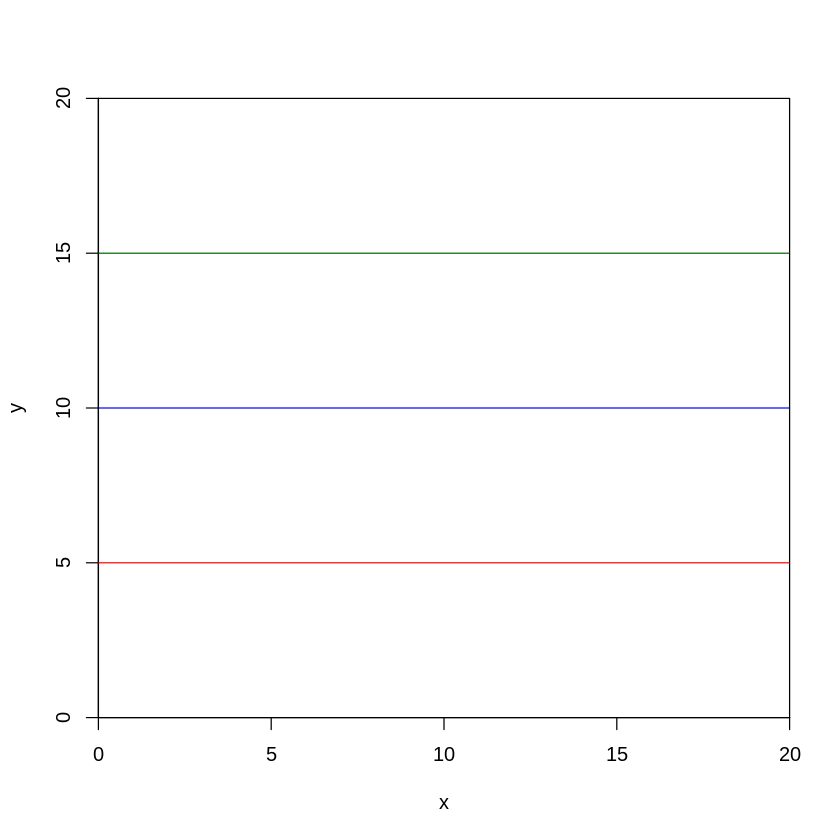

In [1]:
plot(
    0,
    type="n",
    xlab="x",
    ylab="y",
    xlim=c(0,20),
    ylim=c(0,20),
    xaxs="i",
    yaxs="i"
)
p <- recordPlot()
abline(h=5, col="red")
abline(h=10, col="blue")
abline(h=15, col="darkgreen")

We can see that the parameter `h` controls the vertical elevation of the line. Since this "vertical elevation" is the *y*-value where the line crosses the *y* axis, it is called the *y*-intercept. In this course, we will shorten *y*-intercept and just say "intercept."

Let's now draw three new lines with the same *y*-intercept values, but we will make these lines tilted instead of horizontal. Notice that these lines cross the *y*-axis in the same places as the lines above. If we want a non-horizontal line we need to use the `a` argument to specify the *y*-intercept of our line, rather than using the `h` argument as we did above:

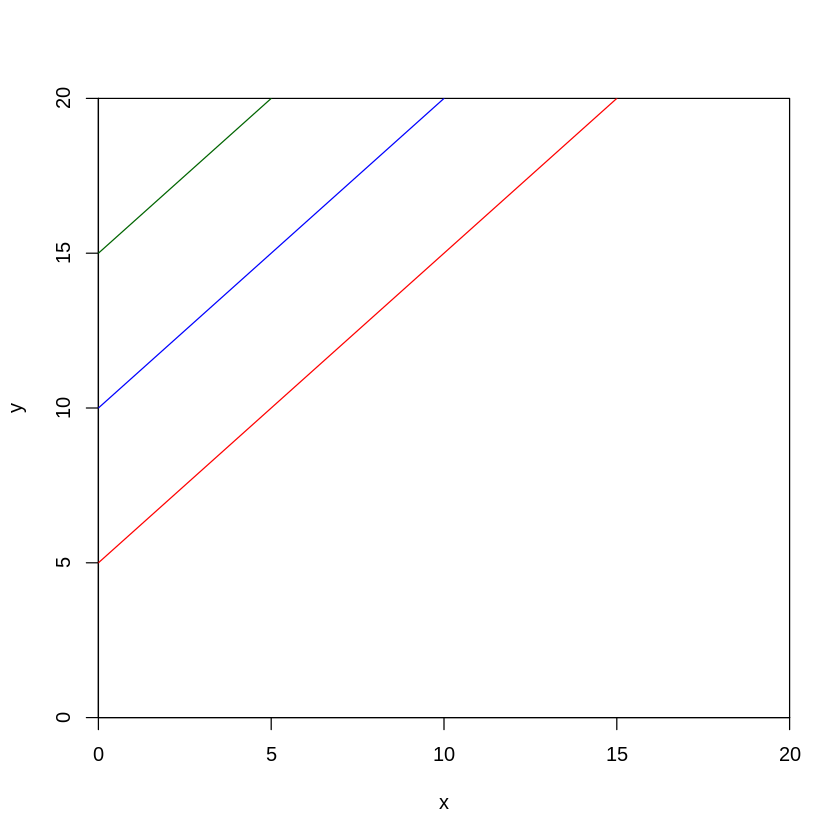

In [2]:
replayPlot(p)
abline(a=5, b=1, col="red")
abline(a=10,b=1, col="blue")
abline(a=15, b=1, col="darkgreen")

All of the lines drawn above have a *slope* value of one, given by the argument `b`. This means that *y* increases by one unit for every one unit increase in *x*. We can make the line steeper by *increasing* the slope value, or more shallow by *decreasing* the slope value. Let's illustrate this below:

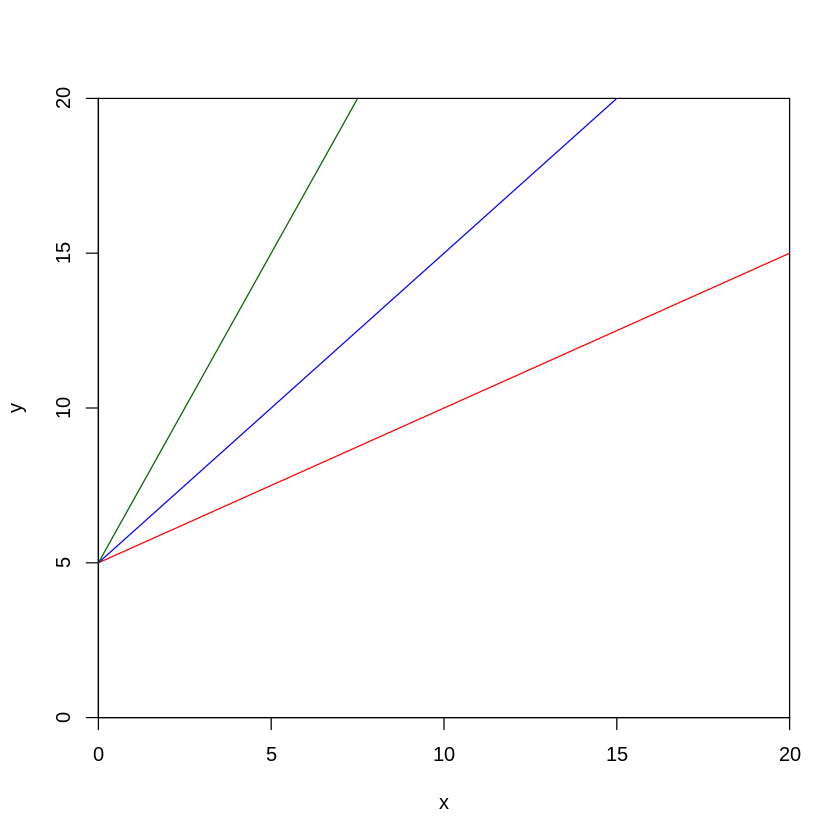

In [3]:
replayPlot(p)
abline(a=5, b=0.5, col="red")
abline(a=5, b=1, col="blue")
abline(a=5, b=2, col="darkgreen")

In the graph above, we have set the *y*-intercept given by the `a` paramter to the same value for all three lines - therefore, we see that they all cross the *y*-axis at the same place. The green line is twice as steep as the blue line and four times as steep as the red line. 

<span style="color:blue;font-weight:bold">Exercise</span>: Use `replayPlot` as showna above to create a blank canvas of the appropriate size, then use `abline` to draw three lines with the following properties:

* Intercept `2`, slope `3.5`, color `forestgreen`
* Intercept `5`, slope `1.2`, color `purple`
* Intercept `15`, slope `-1.8`, color `pink`

Pass your arguments to `abline` in the following order: `a`, `b`, `col`

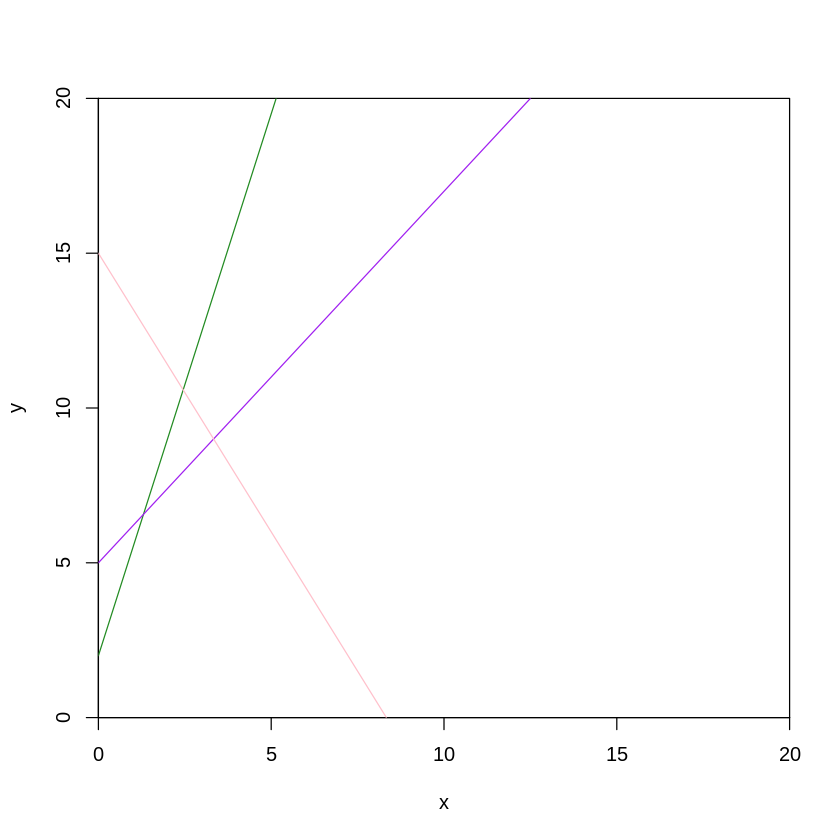

In [8]:
# delete this entire line and replace it with your code

replayPlot(p)
abline(a=2, b=3.5, col="forestgreen")
abline(a=5, b=1.2, col="purple")
abline(a=15, b=-1.8, col="pink")

In [9]:
assert.true(
    all(get.args.for.call("abline", -3) == c('2', '3.5', '"forestgreen"')),
    "Did you draw the <code>forestgreen</code> line correctly?"
)
assert.true(
    all(get.args.for.call("abline", -2) == c('5', '1.2', '"purple"')),
    "Did you draw the <code>purple</code> line correctly?"
)
assert.true(
    all(get.args.for.call("abline", -1) == c('15', '-1.8', '"pink"')),
    "Did you draw the <code>pink</code> line correctly?"
)
success()

Correct!

## Which Line is the Best?

Let's take another look at our data from the previous lesson:

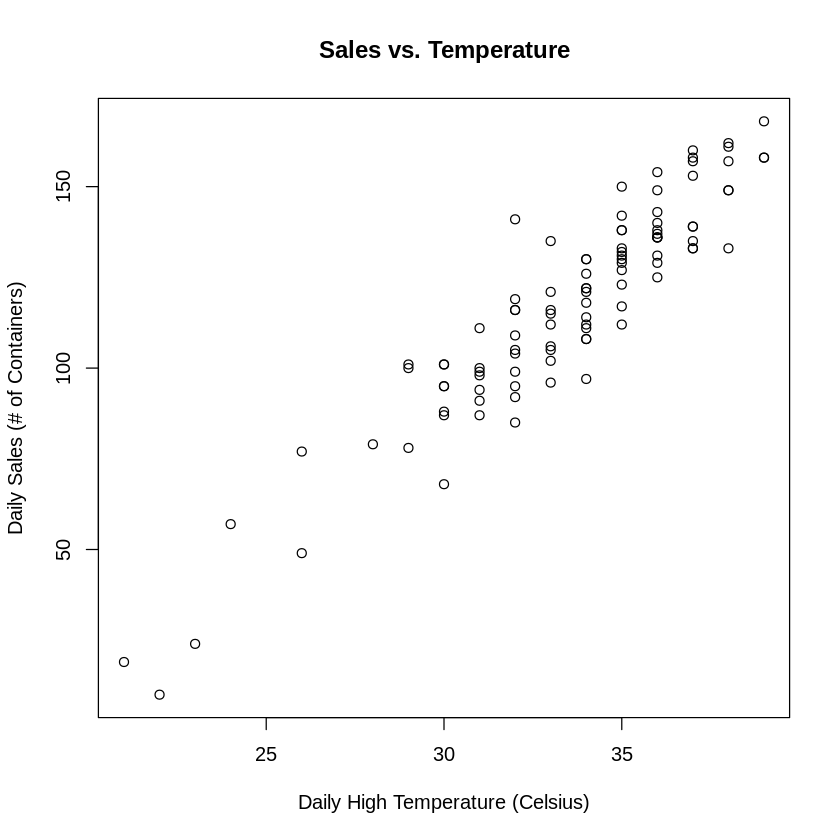

In [9]:
temp.df <- read.csv("data/ice-cream-sales.csv")
plot(
    DailySalesContainers ~ DailyHighTemperatureC,
    data=temp.df,
    xlab="Daily High Temperature (Celsius)",
    ylab="Daily Sales (# of Containers)",
    main="Sales vs. Temperature"
)
temp.plot <- recordPlot()

Let's take another look at the "best fit" line that R chose for us:

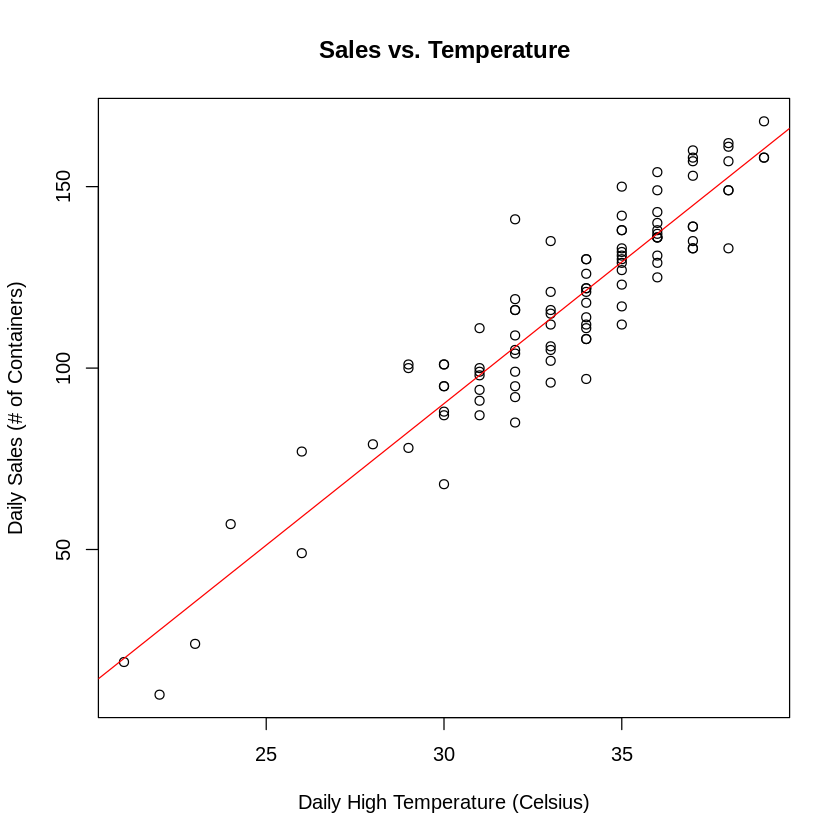

In [10]:
model <- lm(DailySalesContainers ~ DailyHighTemperatureC, data=temp.df)
replayPlot(temp.plot)
abline(model, col="red")

How exactly does R choose this line? To understand the answer, we need to introduce the concept of a *residual*. A residual is the difference between an actual value of the dependent variable that we observed and one that was predicted by our model for the same data point. For example, let's highlight the point `(24, 57)` from our dataset in green.

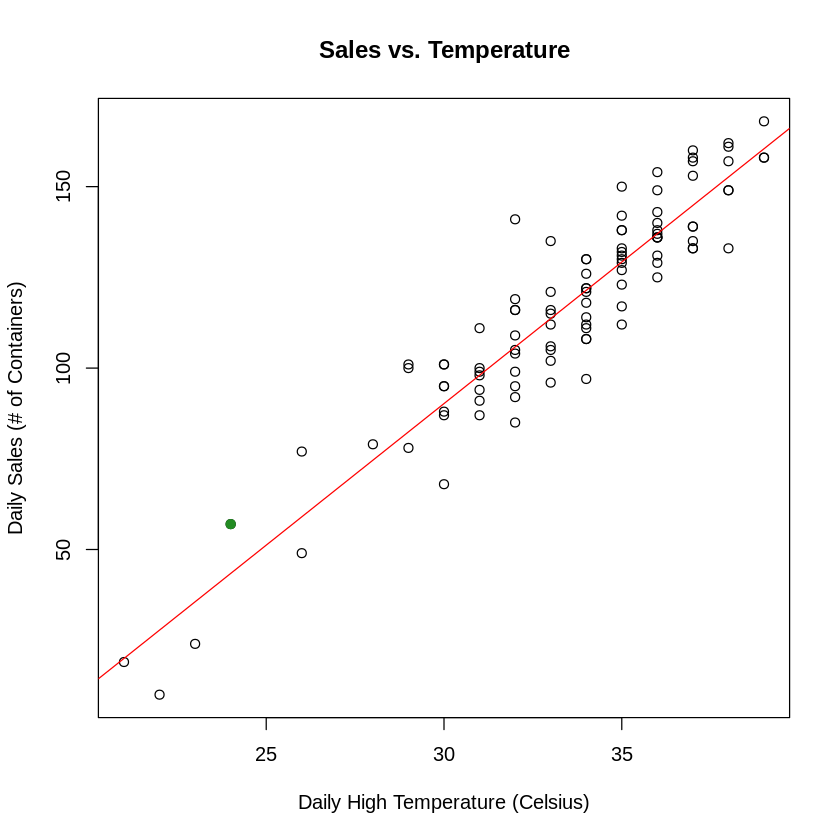

In [11]:
x.value <- 24
actual.y.value <- 57
replayPlot(temp.plot)
points(x.value,actual.y.value, col="forestgreen", pch=19)
abline(model, col="red")

The *actual* value of the dependent variable that we observed for this data point is `57` - this is how many containers of ice cream that we *actually* sold. To find the residual for this data point, we need to look at the difference between what our model predicts. Let's get our model's prediction and draw it in blue on the same graph:

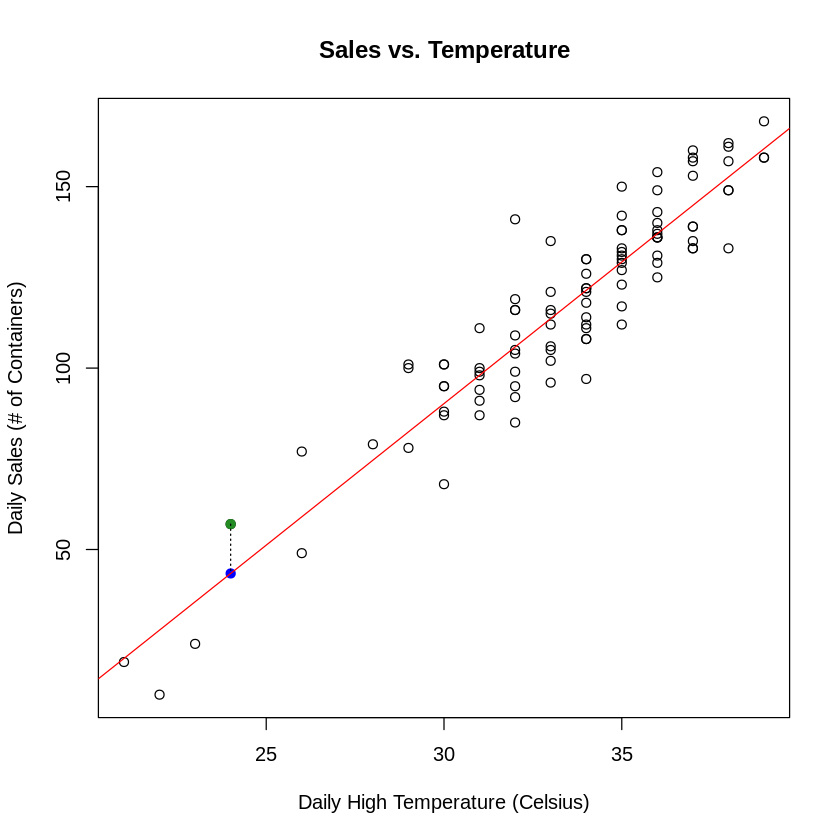

In [12]:
predicted.y.value <- predict(model, newdata=data.frame("DailyHighTemperatureC"=x.value))
replayPlot(temp.plot)
points(x.value,actual.y.value, col="forestgreen", pch=19)
points(x.value,predicted.y.value, col="blue", pch=19)
segments(x.value, actual.y.value, x.value, predicted.y.value, lty=3)
abline(model, col="red")

The length of the dashed line is the magnitude of our residual for this data point - we can calculate the precise value of the residual below:

In [13]:
residual.value <- actual.y.value - predicted.y.value
residual.value

1 
13.59648

Conveniently, R computes the residual value for every single point in our data set and stores them in our `model` object under the name `residuals`:

In [14]:
head(model$residuals)

1           2           3           4           5           6 
 -0.9950704 -17.7978873 -11.6007042  13.5964789 -10.0091549  17.9908451

It turns out that there are multiple ways to measure which line is "best," but by far the most common way is a procedure called *least squares*. In the least squares procedure, we search for the line that minimizes the *sum of squared residuals* of our predictions. We can see how *sum of squared residuals* for a given linear model is computed using the code below:

In [15]:
squared.residuals <- model$residuals^2
sum.of.squared.residuals <- sum(squared.residuals)
print(paste("The sum of squared residuals:", sum.of.squared.residuals))

[1] "The sum of squared residuals: 11523.0598591549"


When we tell R to find us the "best fit" line by using the function `lm`, what we are really saying is: "Find me the *intercept* and *slope* values that give me the lowest value of the sum of squared residuals."

## Understanding Parameter Uncertainties

In our first lesson, we were concerned with predicting *y*-values because this was the business problem that we were faced with at the time. However, sometimes our business goal is not to predict *y*-values but rather to find accurate values for the *model parameters* such as the slope or intercept. 

For example, suppose that we purchased a large truck for delivering products to our customers.
When we shopped for the truck, we compared different models based on their fuel economy - we wanted to get a truck that didn't use too much fuel in order to save money. When we purchased the truck, the manufacturer told us that it consumed `4 L` of fuel per `100km`. But how can we tell that the manufacturer told us the truth about the fuel economy of the truck that we purchased?

To measure fuel economy, we need to measure the *relationship* between the distance travelled by our truck and the fuel that it has consumed. Suppose that we have measured these quantities a number of times after refuelling and obtained the following dataset:

In [16]:
fuel.df <- read.csv("data/fuel-consumption.csv") 
head(fuel.df)

DistanceTraveledKM,FuelConsumedL
<dbl>,<dbl>
952.24,42.95
1110.41,49.25
1012.33,45.39
885.92,40.68
914.68,40.82
1246.50,57.11


We can look at a scatter plot of this data as our first step in deciding whether a linear model is appropriate for this relationship:

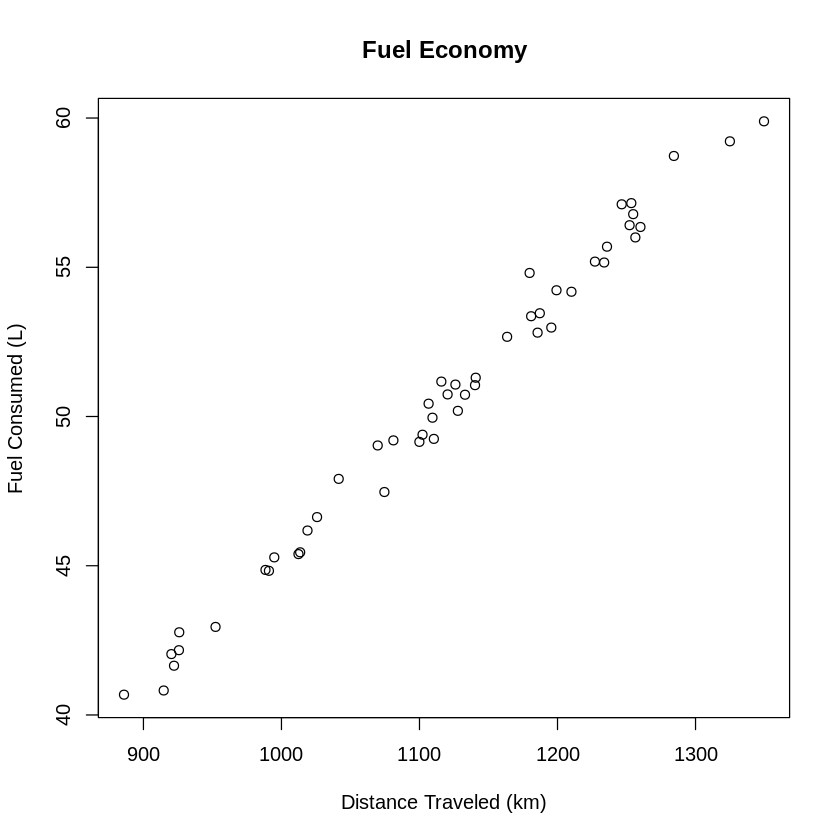

In [17]:
plot(
    FuelConsumedL ~ DistanceTraveledKM,
    data = fuel.df,
    xlab="Distance Traveled (km)", 
    ylab="Fuel Consumed (L)", 
    main="Fuel Economy"
)
plot.fuel <- recordPlot()

We can create a linear model from this data as follows:

In [18]:
model.fuel <- lm(FuelConsumedL ~ DistanceTraveledKM, data = fuel.df)

Let's add the fitted line to our graph:

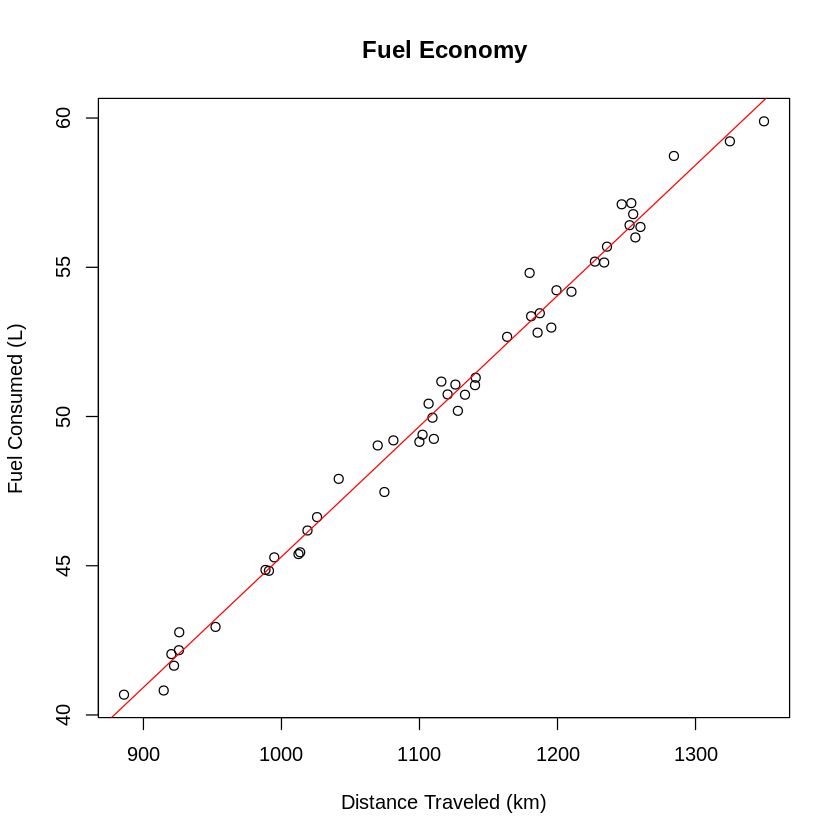

In [19]:
replayPlot(plot.fuel)
abline(model.fuel, col="red")

The `slope` and `intercept` parameters that define our line are stored in the `coefficients` attribute of our `model.fuel` object:

In [20]:
model.fuel$coefficients

(Intercept) DistanceTraveledKM 
        1.54504696         0.04375488

We can also see them by using the `summary` function:

In [21]:
summary(model.fuel)


Call:
lm(formula = FuelConsumedL ~ DistanceTraveledKM, data = fuel.df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.09317 -0.38501  0.01244  0.24911  1.64338 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.5450470  0.7598218   2.033   0.0476 *  
DistanceTraveledKM 0.0437549  0.0006762  64.703   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.562 on 48 degrees of freedom
Multiple R-squared:  0.9887,	Adjusted R-squared:  0.9884 
F-statistic:  4187 on 1 and 48 DF,  p-value: < 2.2e-16


Don't worry about all of the other numbers in the `summary` output above - they will be explained in subsequent lessons. We can extract the `slope` and `intercept` as simple numbers as follows:

In [22]:
intercept <- unname(model.fuel$coefficients['(Intercept)'])
slope <- unname(model.fuel$coefficients['DistanceTraveledKM'])
print(intercept)
print(slope)

[1] 1.545047
[1] 0.04375488


Our `slope` is currently given in units of `L/km` - let's convert it to `L/100km` to match standard practice:

In [23]:
specific.consumption <- round(slope * 100, 1)
specific.consumption

[1] 4.4

But the manufacturer told us that the truck would consume `4 L/100km`, not `4.4`! Were we cheated? We need to be careful about answering this question - as the scatter plot above shows, the linear relationship in our data is not perfect - there is some noise due to various factors such as traffic and other driving condition fluctuations. Perhaps this noise is affecting our estimate of the slope. We can assesss our level of certainty in our conclusion using *confidence intervals* for the slope, just as we used confidence intervals for our predictions in the previous lesson.

## Confidence Intervals for Parameters

We can compute a confidence interval for our slope parameter as follows:

In [24]:
confint(model.fuel, 'DistanceTraveledKM', level=0.95)

,2.5 %,97.5 %
DistanceTraveledKM,0.04239522,0.04511455


We can interpret the result above as follows: there is a `2.5%` chance that the "true" slope is below the first value (`0.042`), while there is a `97.5%` chance that the true slope is below the second value (`0.045`) - this is a confusing but mathematically rigorous way of saying that there is a `95%` chance (`97.5 - 2.5`) that the true value of the slope is between these values.  

So, were we cheated? Based on this data, it appears very likely that we were. 